<a href="https://colab.research.google.com/github/juanserrano90/codelatam/blob/main/Data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
from os.path import isfile

import numpy as np
import pandas as pd
import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt

# from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Dataset import and pre-processing for image generation

In [2]:
file_df_raw = "/content/drive/MyDrive/La_Serena_2024/Project/sn_data.parquet"
df_raw = pd.read_parquet(file_df_raw)

In [ ]:
df_raw.head()

,SN Subtype,SN Subtype ID,SN Maintype,SN Maintype ID,Spectral Phase,2501.69,2505.08,2508.48,2511.87,2515.28,...,9872.21,9885.59,9898.98,9912.39,9925.82,9939.27,9952.73,9966.21,9979.71,9993.24
SN Name,,,,,,,,,,,,,,,,,,,,,
sn2008ar,Ia-norm,0,Ia,0,-8.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sn2008ar,Ia-norm,0,Ia,0,-7.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sn2008ar,Ia-norm,0,Ia,0,-6.6,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sn2008ar,Ia-norm,0,Ia,0,-4.6,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sn2008ar,Ia-norm,0,Ia,0,-3.7,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_raw.describe()

,SN Subtype ID,SN Maintype ID,Spectral Phase,2501.69,2505.08,2508.48,2511.87,2515.28,2518.69,2522.1,...,9872.21,9885.59,9898.98,9912.39,9925.82,9939.27,9952.73,9966.21,9979.71,9993.24
count,5001.000000,5001.000000,5001.000000,5001.0,5001.0,5.001000e+03,5001.000000,5001.000000,5001.000000,5001.000000,...,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.00000,5001.000000,5001.0,5001.0
mean,3.993201,0.655069,36.539334,0.0,0.0,7.998400e-07,0.000005,0.000010,0.000007,0.000019,...,0.000008,0.000093,0.000039,0.000055,0.000027,0.000024,0.00001,0.000005,0.0,0.0
std,5.162127,1.024109,88.017382,0.0,0.0,2.827296e-05,0.000130,0.000244,0.000330,0.000641,...,0.005317,0.004881,0.003690,0.002672,0.001601,0.001002,0.00043,0.000113,0.0,0.0
min,0.000000,0.000000,-82.700000,0.0,0.0,0.000000e+00,-0.002000,-0.003000,-0.008000,-0.005000,...,-0.059000,-0.038000,-0.059000,-0.021000,-0.012000,-0.008000,-0.00300,-0.001000,0.0,0.0
25%,0.000000,0.000000,-0.200000,0.0,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0
50%,1.000000,0.000000,11.900000,0.0,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0
75%,8.000000,1.000000,36.100000,0.0,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0
max,16.000000,3.000000,1103.000000,0.0,0.0,1.000000e-03,0.004000,0.009000,0.015000,0.025000,...,0.107000,0.153000,0.071000,0.052000,0.036000,0.022000,0.00900,0.002000,0.0,0.0


the data is stored in a somewhat bizzarro way, with the wavelength as the column name and the row as the SN

In [ ]:
wavelength = np.array([float(c) for c in df_raw.columns[5:]])

In [ ]:
wavelength.shape

(1024,)

In [ ]:
df_raw.loc[(df_raw.index == "sn2008ar") * (df_raw["Spectral Phase"] == -2.7)]

,SN Subtype,SN Subtype ID,SN Maintype,SN Maintype ID,Spectral Phase,2501.69,2505.08,2508.48,2511.87,2515.28,...,9872.21,9885.59,9898.98,9912.39,9925.82,9939.27,9952.73,9966.21,9979.71,9993.24
SN Name,,,,,,,,,,,,,,,,,,,,,
sn2008ar,Ia-norm,0,Ia,0,-2.7,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
plt.plot(wavelength, df_raw.loc[(df_raw.index == "sn2008ar") * (df_raw["Spectral Phase"] == -2.7)].iloc[:, 5:].values[0])

## Explore data:

is there padding? invalid data, spurious entries?

### unique SN

In [ ]:
print('Number of SNs:', len(df_raw.index.categories))

Number of SNs: 518


### unique SN subtypes

In [ ]:
print('SN subtypes:', df_raw['SN Subtype'].unique())

SN subtypes: ['Ia-norm', 'Ia-91T', 'Ia-csm', 'Ia-91bg', 'Ib-norm', ..., 'Ic-broad', 'Ic-pec', 'IIn', 'Ibn', 'Ib-pec']
Length: 17
Categories (17, object): ['II-pec', 'IIL', 'IIP', 'IIb', ..., 'Ibn', 'Ic-broad', 'Ic-norm', 'Ic-pec']


In [ ]:
subtypes  = df_raw['SN Subtype'].unique()

for i in subtypes:
  print(i)

Ia-norm
Ia-91T
Ia-csm
Ia-91bg
Ib-norm
Iax
Ia-pec
Ic-norm
IIP
IIL
IIb
II-pec
Ic-broad
Ic-pec
IIn
Ibn
Ib-pec


### unique SN main types

In [ ]:
types = df_raw['SN Maintype'].unique()
print('Number of SN types:', len(types))
print('types:', list(types))

Number of SN types: 4
types: ['Ia', 'Ib', 'Ic', 'II']


In [ ]:
# I want the name to be on the first column, reset index
df_raw = df_raw.reset_index()

### How many SNs of each type

In [ ]:
grouped = df_raw.groupby(['SN Maintype', 'SN Name'], observed=True)['SN Name'].value_counts()

In [ ]:
grouped.groupby(level=0, observed=True).count()

,count
SN Maintype,
II,11
Ia,414
Ib,46
Ic,47


In [ ]:
grouped.index.levels[0].values

['II', 'Ia', 'Ib', 'Ic']
Categories (4, object): ['II', 'Ia', 'Ib', 'Ic']

### Typical series length (in time)

In [ ]:
df_raw.groupby('SN Maintype', observed=True)['SN Maintype'].value_counts()

,count
SN Maintype,
II,494
Ia,3288
Ib,644
Ic,575


In [ ]:
# group by object and calculate the typical series length
df_raw.groupby('SN Name', observed=True)['SN Name'].value_counts().sort_values(ascending=False)

,count
SN Name,
sn1987A,241
sn1993J,73
sn2005cf,67
sn2003du,60
sn1998S,57
...,...
sn07bd,1
sn07al,1
sn2006cq,1


In [ ]:
df_raw.groupby('SN Name', observed=True)['SN Name'].value_counts().sort_values(ascending=False).mean()

9.654440154440154

In [ ]:
# group by object and calculate the typical series length
series_length = (df_raw.groupby('SN Name', observed=True)['Spectral Phase'].max()-df_raw.groupby('SN Name', observed=True)['Spectral Phase'].min()).sort_values(ascending=False).mean()

print('Typical series length is:', series_length)

Typical series length is: 74.18314092664092


### NaNs?

In [ ]:
df_raw.isna().sum().max()

0

In [ ]:
print('number of nans:', df_raw.isna().sum().max())

number of nans: 0


In [ ]:
df_raw.head()

,SN Name,SN Subtype,SN Subtype ID,SN Maintype,SN Maintype ID,Spectral Phase,2501.69,2505.08,2508.48,2511.87,...,9872.21,9885.59,9898.98,9912.39,9925.82,9939.27,9952.73,9966.21,9979.71,9993.24
0,sn2008ar,Ia-norm,0,Ia,0,-8.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,sn2008ar,Ia-norm,0,Ia,0,-7.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,sn2008ar,Ia-norm,0,Ia,0,-6.6,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,sn2008ar,Ia-norm,0,Ia,0,-4.6,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,sn2008ar,Ia-norm,0,Ia,0,-3.7,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
sn2008ar = df_raw.loc[df_raw['SN Name'] == "sn2008ar"]
sn2008ar.shape

(18, 1030)

### Wavelength span

In [ ]:
print(wavelength.min(), wavelength.mean(), wavelength.max())

2501.69 5410.10734375 9993.24


In [ ]:
# usar 2500 a 10000
xlim = [2500, 10000]

### Flux span

In [ ]:
df_raw.head()

,SN Name,SN Subtype,SN Subtype ID,SN Maintype,SN Maintype ID,Spectral Phase,2501.69,2505.08,2508.48,2511.87,...,9872.21,9885.59,9898.98,9912.39,9925.82,9939.27,9952.73,9966.21,9979.71,9993.24
0,sn2008ar,Ia-norm,0,Ia,0,-8.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,sn2008ar,Ia-norm,0,Ia,0,-7.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,sn2008ar,Ia-norm,0,Ia,0,-6.6,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,sn2008ar,Ia-norm,0,Ia,0,-4.6,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,sn2008ar,Ia-norm,0,Ia,0,-3.7,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(df_raw.iloc[:,6:].mean().mean(), 3*df_raw.iloc[:,6:].std().std())

-0.00026101225067486555 6.807673554040658


In [ ]:
# which rows have the max flux value?
print(df_raw.iloc[:,6:].max().max())
# which row is that?
print(df_raw.iloc[:,6:].max().idxmax())

2071.001
3301.9


In [ ]:
df_raw.loc[df_raw['3301.9'] == 2071.001]

,SN Name,SN Subtype,SN Subtype ID,SN Maintype,SN Maintype ID,Spectral Phase,2501.69,2505.08,2508.48,2511.87,...,9872.21,9885.59,9898.98,9912.39,9925.82,9939.27,9952.73,9966.21,9979.71,9993.24
4631,iPTF13bvn,Ib-norm,6,Ib,1,-12.7,0.0,0.0,0.0,0.0,...,-0.053,-0.014,-0.027,-0.015,-0.003,-0.001,-0.001,0.0,0.0,0.0


In [ ]:
plt.plot(wavelength, df_raw.loc[df_raw['3301.9'] == 2071.001].values[0,6:])
#plt.xlim(3000,4000)

In [ ]:
# remove that row
df_ = df_raw.drop(df_raw.loc[df_raw['3301.9'] == 2071.001].index)

In [ ]:
print(df_.iloc[:,6:].mean().mean(), df_.iloc[:,6:].std().std())

0.002066028124999999 0.12497102525820329


In [ ]:
df_.iloc[:,6:].max().sort_values(ascending=False)[0:20]

,0
4190.28,56.627
3537.93,54.727
4581.92,52.980
4195.95,47.553
4230.18,25.877
4600.57,22.404
3490.35,18.620
3664.68,16.329
4465.56,16.155
3315.34,15.685


In [ ]:
print(df_.iloc[:,6:].min().min(), df_.iloc[:,6:].max().max())

-17.943 56.627


### Standarize in Y axis

In [ ]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].plot(wavelength, df_.iloc[0].values[6:])
ax[1].plot(wavelength, df_.iloc[1000].values[6:])
ax[2].plot(wavelength, df_.iloc[2000].values[6:])

In [ ]:
# how to standarize?
# min max scaling (daniel)

$y_{scaled} = \frac{y-y_{min}}{y_{max}-y_{min}}$

In [ ]:
minmax_scaler = MinMaxScaler(feature_range = (0,1))
robust_scaler = RobustScaler()
standard_scaler = StandardScaler()

In [ ]:
scalings = {}
# minmax
scalings['minmax'] = minmax_scaler.fit_transform(df_.iloc[:,6:].transpose()).transpose()
# standard
scalings['standard'] = standard_scaler.fit_transform(df_.iloc[:,6:].transpose()).transpose()
# robust
scalings['robust'] = robust_scaler.fit_transform(df_.iloc[:,6:].transpose()).transpose()

In [ ]:
scalings['standard'].shape

(5000, 1024)

In [ ]:
for i, k in enumerate(scalings.keys()):
  print(i,k)

0 minmax
1 standard
2 robust


In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for i, keys in enumerate(scalings.keys()):
  ax[i,0].plot(wavelength, scalings[keys][0], label=keys)
  ax[i,1].plot(wavelength, scalings[keys][1000], label=keys)
  ax[i,2].plot(wavelength, scalings[keys][2000], label=keys)
  ax[i,0].legend()
ax[0,1].set_title('Scaling estrategies comparision for 3 spectrums')

Text(0.5, 1.0, 'Scaling estrategies comparision for 3 spectrums')

In [ ]:
# lets use minmax scaling
df_.iloc[:,6:] = scalings['minmax']

In [ ]:
for i in range(18):
  plt.figure()
  plt.plot(wavelength, df_.iloc[:,6:].values[i], lw=0.4, ls='-', color='k',
           label='Spectral Phase:'+str(df_['Spectral Phase'].iloc[i]))
  plt.legend()

<ipython-input-50-2fcea2372e00>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


### Flux span now?

In [ ]:
# mean of mean of fluxes
print(df_.iloc[:,6:].mean().mean())
# mean of std of fluxes
print(df_.iloc[:,6:].std().mean())

0.44939688173721637
0.15765526341735236


In [ ]:
# which rows have the max flux value?
print(df_.iloc[:,6:].max().max())
print(df_.iloc[:,6:].min().min())
# which row is that?
print(df_.iloc[:,6:].max().idxmax())
# wavelength range
print(wavelength.min(), wavelength.max())

1.0000000000000002
0.0
2739.22
2501.69 9993.24


### Saving plots

In [ ]:
# DANIEL
# For training, I used the base CLIP or ViT model with a resolution of 224x224 pixels
# and created images with a figure size of 2.24 x 2.24 inches at 100 dpi.

In [ ]:
# my_dpi = 260
# fig, ax = plt.subplots(figsize=(224/my_dpi,224/my_dpi), dpi=my_dpi)
# ax.plot(wavelength, df_.iloc[0,6:].values, lw=0.3, ls='-', color='k', alpha=1)
# ax.axis('off')
# ax.set_box_aspect(1)
# ax.set_xlim(xlim[0], xlim[1])
# ax.set_ylim(0,1)
# plt.savefig('sn2008ar.png', bbox_inches='tight', dpi=my_dpi)
# plt.show()

In [ ]:
df_.iloc[0,0]

'sn2008ar'

In [ ]:
# save at 100 dpi and 224x224 pixels
my_dpi = 100
fig, ax = plt.subplots(figsize=(2.65,2.65), dpi=my_dpi)
ax.plot(wavelength, df_.iloc[0,6:].values, lw=1, ls='-', color='k', alpha=1)
ax.axis('off')
ax.set_xlim(xlim[0], xlim[1])
ax.set_ylim(0,1)
ax.set_box_aspect(1)
plt.savefig('asd.png', bbox_inches='tight', dpi=my_dpi)
plt.show()

/tmp/ipykernel_517540/3407407095.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [ ]:
# which info to save?
keys = df_.columns[0:7]
keys

Index(['SN Name', 'SN Subtype', 'SN Subtype ID', 'SN Maintype',
       'SN Maintype ID', 'Spectral Phase', '2501.69'],
      dtype='object')

In [ ]:
# we need SN name, SN Subtype ID, SN Maintype ID, Spectral Phase: 0, 2, 4, 5

In [ ]:
xlim

[2500, 10000]

In [ ]:
df_.shape

(5000, 1030)

In [ ]:
# save all plots in a folder
my_dpi = 100
for i in range(1000):
  fig, ax = plt.subplots(figsize=(2.65,2.65), dpi=my_dpi)
  ax.plot(wavelength, df_.iloc[i,6:].values, lw=1, ls='-', color='k', alpha=1)
  ax.axis('off')
  ax.set_xlim(xlim[0], xlim[1])
  ax.set_ylim(0,1)
  ax.set_box_aspect(1)
  plt.savefig('./images/'+df_.iloc[i,0]+'_'+str(df_.iloc[i,2])+'_'+str(df_.iloc[i,4])+'_'+str(df_.iloc[i,5])+'_'+str(i)+'.png',
              bbox_inches='tight', dpi=my_dpi)

In [ ]:
# save all plots in a folder
my_dpi = 100
for i in range(1000,2000):
  fig, ax = plt.subplots(figsize=(2.65,2.65), dpi=my_dpi)
  ax.plot(wavelength, df_.iloc[i,6:].values, lw=1, ls='-', color='k', alpha=1)
  ax.axis('off')
  ax.set_xlim(xlim[0], xlim[1])
  ax.set_ylim(0,1)
  ax.set_box_aspect(1)
  plt.savefig('./images/'+df_.iloc[i,0]+'_'+str(df_.iloc[i,2])+'_'+str(df_.iloc[i,4])+'_'+str(df_.iloc[i,5])+'_'+str(i)+'.png',
              bbox_inches='tight', dpi=my_dpi)

In [ ]:
# save all plots in a folder
my_dpi = 100
for i in range(2000,3000):
  fig, ax = plt.subplots(figsize=(2.65,2.65), dpi=my_dpi)
  ax.plot(wavelength, df_.iloc[i,6:].values, lw=1, ls='-', color='k', alpha=1)
  ax.axis('off')
  ax.set_xlim(xlim[0], xlim[1])
  ax.set_ylim(0,1)
  ax.set_box_aspect(1)
  plt.savefig('./images/'+df_.iloc[i,0]+'_'+str(df_.iloc[i,2])+'_'+str(df_.iloc[i,4])+'_'+str(df_.iloc[i,5])+'_'+str(i)+'.png',
              bbox_inches='tight', dpi=my_dpi)

In [ ]:
# save all plots in a folder
my_dpi = 100
for i in range(3000,4000):
  fig, ax = plt.subplots(figsize=(2.65,2.65), dpi=my_dpi)
  ax.plot(wavelength, df_.iloc[i,6:].values, lw=1, ls='-', color='k', alpha=1)
  ax.axis('off')
  ax.set_xlim(xlim[0], xlim[1])
  ax.set_ylim(0,1)
  ax.set_box_aspect(1)
  plt.savefig('./images/'+df_.iloc[i,0]+'_'+str(df_.iloc[i,2])+'_'+str(df_.iloc[i,4])+'_'+str(df_.iloc[i,5])+'_'+str(i)+'.png',
              bbox_inches='tight', dpi=my_dpi)

In [ ]:
# save all plots in a folder
my_dpi = 100
for i in range(4000,5000):
  fig, ax = plt.subplots(figsize=(2.65,2.65), dpi=my_dpi)
  ax.plot(wavelength, df_.iloc[i,6:].values, lw=1, ls='-', color='k', alpha=1)
  ax.axis('off')
  ax.set_xlim(xlim[0], xlim[1])
  ax.set_ylim(0,1)
  ax.set_box_aspect(1)
  plt.savefig('./images/'+df_.iloc[i,0]+'_'+str(df_.iloc[i,2])+'_'+str(df_.iloc[i,4])+'_'+str(df_.iloc[i,5])+'_'+str(i)+'.png',
              bbox_inches='tight', dpi=my_dpi)

: 

In [ ]:
''' In this section of the code, we separate the images using the name of each file.
    The second number of each file (i.e. the first value in between underscores, e.g.
    sn2004dn_10_2_55.0_4458.png it would be 10) represents the subtype.
    At the stage of the process on August 26th, 2024 we will work with 3 categories:
    0 - Ia-norm
    1 - Ia-pec (all Ia that are not Ia-norm)
    2 - Other (all supernovae that is not Ia).
    Here we will first determine the index and categorize each index as stated above.'''

In [ ]:
df_.head()

,SN Name,SN Subtype,SN Subtype ID,SN Maintype,SN Maintype ID,Spectral Phase,2501.69,2505.08,2508.48,2511.87,...,9872.21,9885.59,9898.98,9912.39,9925.82,9939.27,9952.73,9966.21,9979.71,9993.24
0,sn2008ar,Ia-norm,0,Ia,0,-8.5,0.620000,0.620000,0.620000,0.620000,...,0.620000,0.620000,0.620000,0.620000,0.620000,0.620000,0.620000,0.620000,0.620000,0.620000
1,sn2008ar,Ia-norm,0,Ia,0,-7.5,0.609115,0.609115,0.609115,0.609115,...,0.609115,0.609115,0.609115,0.609115,0.609115,0.609115,0.609115,0.609115,0.609115,0.609115
2,sn2008ar,Ia-norm,0,Ia,0,-6.6,0.613961,0.613961,0.613961,0.613961,...,0.613961,0.613961,0.613961,0.613961,0.613961,0.613961,0.613961,0.613961,0.613961,0.613961
3,sn2008ar,Ia-norm,0,Ia,0,-4.6,0.605621,0.605621,0.605621,0.605621,...,0.605621,0.605621,0.605621,0.605621,0.605621,0.605621,0.605621,0.605621,0.605621,0.605621
4,sn2008ar,Ia-norm,0,Ia,0,-3.7,0.595781,0.595781,0.595781,0.595781,...,0.595781,0.595781,0.595781,0.595781,0.595781,0.595781,0.595781,0.595781,0.595781,0.595781


# Generate Dataset class

### Get labels for dataset creation

In [3]:
subtypes  = df_raw['SN Subtype'].unique()
subtypes_ID = df_raw['SN Subtype ID'].unique()

for subtype, subtype_ID in zip(subtypes, subtypes_ID):
  print(subtype, subtype_ID)


Ia-norm 0
Ia-91T 1
Ia-csm 3
Ia-91bg 2
Ib-norm 6
Iax 4
Ia-pec 5
Ic-norm 10
IIP 13
IIL 14
IIb 8
II-pec 16
Ic-broad 11
Ic-pec 12
IIn 15
Ibn 7
Ib-pec 9


### Get pre-processed images from google drive

In [4]:
import os
image_folder = '/content/drive/MyDrive/La_Serena_2024/images'
image_files = os.listdir(image_folder)

from PIL import Image
image_names = []
for image_file in image_files:
  image_path = os.path.join(image_folder, image_file)
  image_names.append(image_file)

print(image_names)

['sn2011ei_8_1_-3.0_4481.png', 'sn2005hg_6_1_-9.29_4462.png', 'sn2005hg_6_1_16.71_4473.png', 'sn2005hg_6_1_-4.29_4467.png', 'sn2005hg_6_1_26.71_4475.png', 'sn2011ei_8_1_13.0_4484.png', 'sn2005hg_6_1_-13.29_4459.png', 'sn2011ei_8_1_-10.0_4478.png', 'sn2005hg_6_1_-12.29_4460.png', 'sn2005hg_6_1_-5.29_4466.png', 'sn2005hg_6_1_-2.29_4469.png', 'sn2005hg_6_1_89.71_4476.png', 'sn2011ei_8_1_-6.0_4479.png', 'sn2005hg_6_1_-0.29_4471.png', 'sn2011ei_8_1_3.0_4482.png', 'sn2011ei_8_1_8.0_4483.png', 'sn2005hg_6_1_-3.29_4468.png', 'sn2005hg_6_1_22.71_4474.png', 'sn2011ei_8_1_-4.0_4480.png', 'sn2005hg_6_1_-10.29_4461.png', 'sn2005hg_6_1_-6.29_4465.png', 'sn2005hg_6_1_-8.29_4463.png', 'sn2005hg_6_1_12.71_4472.png', 'sn2005hg_6_1_-1.29_4470.png', 'sn2011ei_8_1_-14.0_4477.png', 'sn2005hg_6_1_-7.29_4464.png', 'PTF12gzk_10_2_-14.7_4492.png', 'sn2005az_10_2_26.3_4512.png', 'PTF12gzk_10_2_-9.7_4493.png', 'sn2011ei_8_1_310.0_4491.png', 'sn2011ei_8_1_17.0_4485.png', 'sn2011ei_8_1_38.0_4486.png', 'sn2005az_10_

# Part of Daniel's tutorial

In [5]:
!pip install -q webdataset transformers torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 866.2/866.2 kB 6.8 MB/s eta 0:00:00


In [6]:
import torch.nn.functional as F
import torch.optim as optim
import torch.nn as nn
import torch

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import webdataset as wds
import random
import io
import os

from transformers import ViTImageProcessor, ViTModel
from torch.utils.data import DataLoader
from torch.utils.data import Dataset

from torchmetrics.classification import F1Score


In [7]:
# Here, choose the GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Convert PIL Image to Pytorch's tensor

In [20]:
# prompt: create dictionary with keys 'id', 'img' and 'label'

from torchvision.io import read_image, ImageReadMode

train_data = {'id': [], 'pixel_values': [], 'y_true': []}

for image_name in image_names:
  train_data['id'].append(image_name[:-4]) # remove the '.png' string
  train_data['pixel_values'].append(read_image(os.path.join(image_folder, image_name), mode=ImageReadMode.GRAY))
  train_data['y_true'].append(int(image_name.split('_')[1]))

# prompt: stack 'pixel_values' list of tensors to a 4D tensor
train_data['pixel_values'] = torch.stack(train_data['pixel_values'])
train_data['y_true'] = torch.tensor(train_data['y_true'])

In [23]:
train_data.keys()

dict_keys(['id', 'pixel_values', 'y_true'])

In [24]:
len(train_data['id'])

5000

In [25]:
train_data['pixel_values'][0].shape

torch.Size([1, 224, 224])

In [26]:
print(train_data['pixel_values'].shape)
train_data['pixel_values'] = train_data['pixel_values'].permute(0, 2, 3, 1)
print(train_data['pixel_values'].shape)

torch.Size([5000, 1, 224, 224])
torch.Size([5000, 224, 224, 1])


In [27]:
print(train_data['y_true'])

tensor([ 8,  6,  6,  ..., 13, 13,  0])


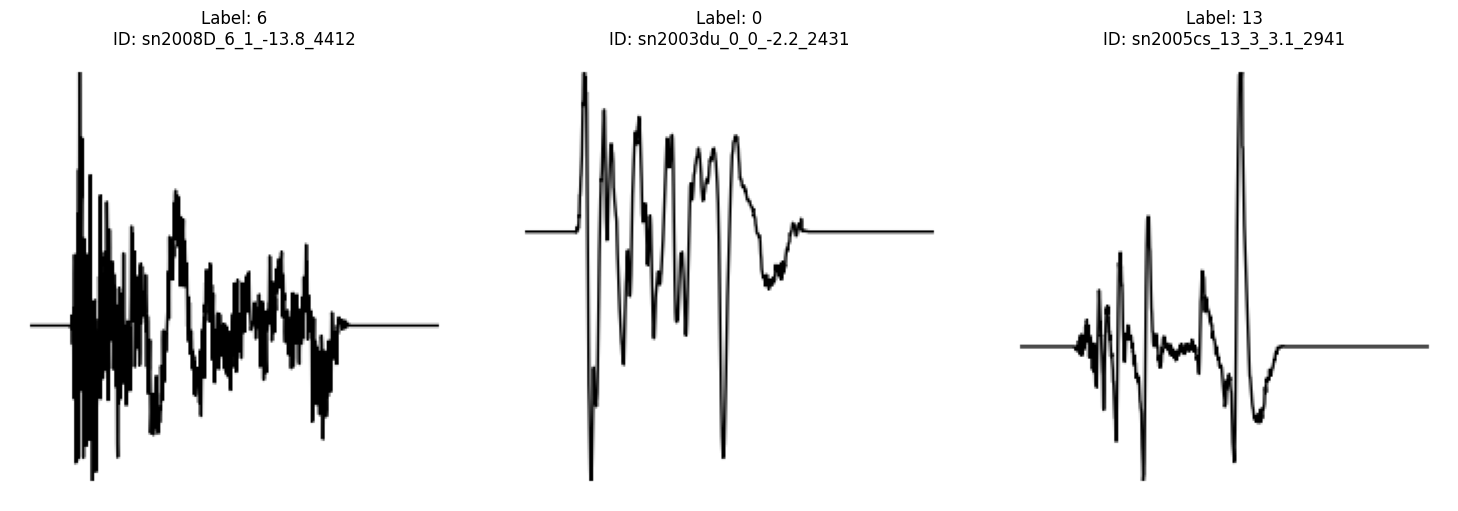

In [32]:
# prompt: add title for each plotted image

num_images = len(train_data['pixel_values'])
random_indices = random.sample(range(num_images), 3)
images = [train_data['pixel_values'][i] for i in random_indices]
labels = [train_data['y_true'][i] for i in random_indices]

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, ax in enumerate(axs):
    ax.imshow(images[i], 'gray')
    ax.axis('off')
    ax.set_title(f"Label: {labels[i]}\nID: {train_data['id'][random_indices[i]]}")

plt.tight_layout()
plt.show()

plt.show()


In [45]:
# Optional: export dictionary as a torch file

import torch
torch.save(train_data, 'train_data.pt')

In [30]:
# prompt: separate train_data in only train and validation data

# Split data into train and validation sets
train_size = int(0.8 * len(train_data['id']))
val_size = len(train_data['id']) - train_size

# Create random indices for splitting
indices = torch.randperm(len(train_data['id']))
train_indices = indices[:train_size]
val_indices = indices[train_size:]

# Create train and validation dictionaries
train_data_split = {
    'id': [train_data['id'][i] for i in train_indices],
    'pixel_values': train_data['pixel_values'][train_indices],
    'y_true': train_data['y_true'][train_indices]
}

val_data_split = {
    'id': [train_data['id'][i] for i in val_indices],
    'pixel_values': train_data['pixel_values'][val_indices],
    'y_true': train_data['y_true'][val_indices]
}


# Dataloader

In [40]:
# prompt: create a dictionary where each key is subtype and value is subtype_ID

inv_dict_mapping_classes = {}
for subtype, subtype_ID in zip(subtypes, subtypes_ID):
  inv_dict_mapping_classes[subtype] = subtype_ID

print(inv_dict_mapping_classes)

{'Ia-norm': 0, 'Ia-91T': 1, 'Ia-csm': 3, 'Ia-91bg': 2, 'Ib-norm': 6, 'Iax': 4, 'Ia-pec': 5, 'Ic-norm': 10, 'IIP': 13, 'IIL': 14, 'IIb': 8, 'II-pec': 16, 'Ic-broad': 11, 'Ic-pec': 12, 'IIn': 15, 'Ibn': 7, 'Ib-pec': 9}


In [41]:
num_classes = len(np.unique(train_data['y_true']))
num_classes

17

In [31]:
batch_size = 64

class CustomDataset(Dataset):
    def __init__(self, data):
        self.ids = data['id']
        # self.pixel_values = torch.from_numpy(data['pixel_values']).float()
        self.pixel_values = data['pixel_values'].float()
        # self.y_true = torch.from_numpy(data['y_true']).long()
        self.y_true = data['y_true'].long()

    def __len__(self):
        return len(self.ids)

    def __getitem__(self, idx):
        return {
            'id': self.ids[idx],
            'pixel_values': self.pixel_values[idx],
            'y_true': self.y_true[idx]
        }

train_dataset = CustomDataset(train_data_split)
val_dataset = CustomDataset(val_data_split)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

# Finetuning

### Model

In [46]:
# prompt: load train_data.pt from google colab if variable not exist

from google.colab import files
if 'train_data' not in locals():
  uploaded = files.upload()
  train_data = torch.load(io.BytesIO(uploaded['train_data.pt']))


In [42]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

pt_model_name = 'google/vit-base-patch32-224-in21k'
processor = ViTImageProcessor.from_pretrained(pt_model_name)
model = ViTModel.from_pretrained(pt_model_name).to(device)

classifier = nn.Linear(model.config.hidden_size, num_classes).to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/352M [00:00<?, ?B/s]

In [43]:
def train_step(batch_data, model, processor, classifier, optimizer, device):
    model.train()
    y_true = batch_data['y_true'].to(device)

    inputs = processor(images=batch_data['pixel_values'], return_tensors="pt").to(device)
    outputs = model(**inputs)
    pooled_output = outputs.last_hidden_state[:, 0, :]

    logits = classifier(pooled_output)
    loss = F.cross_entropy(logits, y_true)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    y_pred = torch.argmax(logits, dim=-1)
    return loss.item(), y_pred, y_true


def validate_step(batch_data, model, processor, classifier, device):
    model.eval()
    with torch.no_grad():
        y_true = batch_data['y_true'].to(device)

        inputs = processor(images=batch_data['pixel_values'], return_tensors="pt").to(device)
        outputs = model(**inputs)
        pooled_output = outputs.last_hidden_state[:, 0, :]

        logits = classifier(pooled_output)
        loss = F.cross_entropy(logits, y_true)

        y_pred = torch.argmax(logits, dim=-1)
        return loss.item(), y_pred, y_true


def predict_step(batch_data, model, processor, classifier, device):
    model.eval()
    with torch.no_grad():
        y_true = batch_data['y_true'].to(device)

        inputs = processor(images=batch_data['pixel_values'], return_tensors="pt").to(device)
        outputs = model(**inputs)
        pooled_output = outputs.last_hidden_state[:, 0, :]

        logits = classifier(pooled_output)
        y_pred_prob = F.softmax(logits, dim=1)
        y_pred = torch.argmax(logits, dim=-1)

        return {
            'id': batch_data['id'],
            'y_pred': y_pred.cpu().numpy(),
            'y_pred_prob': y_pred_prob.cpu().numpy(),
            'y_true': y_true.cpu().numpy()
        }

In [44]:
lr = 2e-5 # 5.0e-6
num_epochs = 1000
patience = 7
best_val_f1 = 0.0
patience_counter = 0
best_model_path = 'best_model_vit.pth'  # Ruta donde se guardará el mejor modelo

params = list(model.parameters()) + list(classifier.parameters())
optimizer = optim.Adam(params, lr=lr)

# Inicializar métricas F1
f1_train = F1Score(task="multiclass", num_classes=num_classes, average='macro').to(device)
f1_val = F1Score(task="multiclass", num_classes=num_classes, average='macro').to(device)

# Bucle de entrenamiento y validación
for epoch in range(num_epochs):
    # Resetear métricas para cada epoch
    train_loss = 0.0
    train_correct = 0
    train_total = 0
    f1_train.reset()

    model.train()
    for batch_idx, batch_data in enumerate(train_dataloader):
        loss, y_pred, y_true = train_step(batch_data, model, processor, classifier, optimizer, device)

        train_loss += loss
        train_correct += (y_pred == y_true).sum()
        train_total += y_true.size(0)

        # Actualizar F1 Score para el conjunto de entrenamiento
        f1_train.update(y_pred, y_true)

    train_loss /= len(train_dataloader)
    train_accuracy = 100. * train_correct / train_total
    train_f1_score = f1_train.compute()

    # Validación
    val_loss = 0.0
    val_correct = 0
    val_total = 0
    f1_val.reset()

    model.eval()
    with torch.no_grad():
        for batch_idx, batch_data in enumerate(val_dataloader):
            loss, y_pred, y_true = validate_step(batch_data, model, processor, classifier, device)

            val_loss += loss
            val_correct += (y_pred == y_true).sum()
            val_total += y_true.size(0)

            # Actualizar F1 Score para el conjunto de validación
            f1_val.update(y_pred, y_true)

    val_loss /= len(val_dataloader)
    val_accuracy = 100. * val_correct / val_total
    val_f1_score = f1_val.compute()

    # Imprimir resultados de la época
    print(f'Epoch {epoch+1}/{num_epochs} | '
          f'Train Loss: {train_loss:.4f} | Train Acc: {train_accuracy:.2f}% | Train F1: {train_f1_score:.4f} | '
          f'Val Loss: {val_loss:.4f} | Val Acc: {val_accuracy:.2f}% | Val F1: {val_f1_score:.4f}')

    # Early stopping basado en el F1 Score de validación y guardado del mejor modelo
    if val_f1_score > best_val_f1:
        best_val_f1 = val_f1_score
        patience_counter = 0  # Restablecer el contador de paciencia
        torch.save(model.state_dict(), best_model_path)  # Guardar el mejor modelo
        print(f"New best model saved at epoch {epoch+1}")
    else:
        patience_counter += 1

    if patience_counter >= patience:
        print("Early stopping triggered.")
        break

print(f"Training complete. Best model saved with F1 Score: {best_val_f1:.4f}")

ValueError: mean must have 1 elements if it is an iterable, got 3